In [29]:
%matplotlib inline
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import scale
import pandas
import matplotlib.pyplot as plt

data = pandas.read_csv('wine.csv')


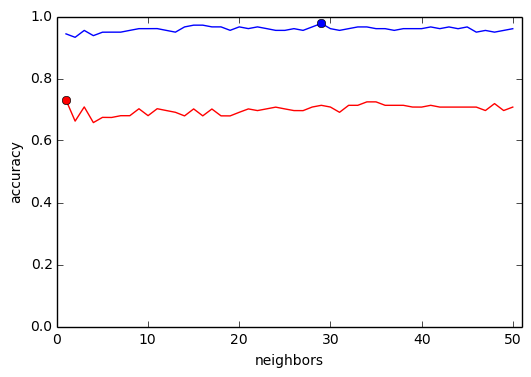

k_max without scaling = <1>
max score without scaling = <0.73>
k_max with scaling = <29>
max score with scaling = <0.98>


In [43]:
X = data.as_matrix()
y = X[:, 0]
X = np.delete(X, [0], axis=1)

kf = KFold(len(X), n_folds=5, shuffle=True, random_state=42)

accuracy = []
for n_neigh in range(1, 51):    
    neigh = KNeighborsClassifier(n_neighbors=n_neigh)
    accuracy.append(np.mean(cross_val_score(estimator=neigh, X=X, y=y, cv=kf)))

accuracy_scaled = []
for n_neigh in range(1, 51):    
    neigh = KNeighborsClassifier(n_neighbors=n_neigh)
    accuracy_scaled.append(np.mean(cross_val_score(estimator=neigh, X=scale(X), y=y, cv=kf)))

x = range(1,51)
plt.plot(x, accuracy, 'r')
plt.plot(x, accuracy_scaled, 'b')
plt.plot(np.argmax(accuracy) + 1, np.amax(accuracy), 'ro')
plt.plot(np.argmax(accuracy_scaled) + 1, np.amax(accuracy_scaled), 'bo')
plt.ylabel('accuracy')
plt.xlabel('neighbors')
plt.axis([0, 51, 0, 1])
plt.show()
print 'k_max without scaling = <{}>'.format(np.argmax(accuracy) + 1)
print 'max score without scaling = <{}>'.format(round(np.amax(accuracy), 2))
print 'k_max with scaling = <{}>'.format(np.argmax(accuracy_scaled) + 1)
print 'max score with scaling = <{}>'.format(round(np.amax(accuracy_scaled), 2))

In [34]:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 3, 4])
kf = KFold(4, n_folds=3, shuffle=True, random_state=42)
print X
scale(X)
# for train_index, test_index in kf:
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     neigh.fit(X_train, y_train)
#     results = neigh.predict(X_test)
#     mistakes_count = np.count_nonzero(results - y_test)
#     err_score = float(mistakes_count) / len(y_test)
#     print 1.0 - err_score
    

[[1 2]
 [3 4]
 [5 6]
 [7 8]]


array([[-1.34164079, -1.34164079],
       [-0.4472136 , -0.4472136 ],
       [ 0.4472136 ,  0.4472136 ],
       [ 1.34164079,  1.34164079]])